$$ \text{EE0404 SIGNAL PROCESSING APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture Notes} $$

$$ \text{Introduction}$$

$$ \text{July 2016} $$


# Objectives

 - The effect of sampling rate
 - Plot and interpret waveforms using Python
 - Learn and use Python for:
     - Signal generation, plotting
     - Decimation & Interpolation: effects in time and frequency domains
     - Spectral (FFT) analysis, Short-time FFT analysis
     - Echo generation (Single, multiple)
     - Digital filtering (Lowpass, Highpass, Bandpass Filtering)


# Course Syllabus

1.	Introduction to course. Sampling Theorem, a practical view 
2.	Discrete Fourier Transform: Basis Functions, mutual projections and frequency resolution
3.	Discrete Fourier Transform: Calculation of FFT coefficients by projection. 
4.	Instantaneous Phase, Instantaneous Frequency. Linear Chirp generation.
5.	Short time Fourier transform: Windowing and operation through matrix columns
6.	Nyquist sampling criterion and aliasing.
7.	Time domain filters: Single and multiple echo filtering
8.	Frequency Domain filters: Effect of zeroes and poles on frequency response
9.	Frequency Domain filters: Digital FIR filter design. 
10.	Frequency Domain filters: Digital IIR filter design, s to z domain.


# Grading
- Homeworks x 10: (% 0  ??)

- Midterm x 2 : (% 60)

- Final Exam: (% 40)

- Exams will be held on CATS system


# Tool Usage: Python
- Using Python Functions
- Sin, cos, ones, zeros
- Summation, multiplication
- Plotting and axis labeling, titles.
- Windowing, 
- FFT  
- Error finding and correction on self studies.


$$ \bf{LECTURE\ 1:} $$




## Sampling theorem

- What is sampling?
- Amplitude: Quantization
    - Number of bits for quantization
    - Recall from: EE5203 Microprocessors
    - Dynamic range, signal conditioning
    - Time: Sampling period (or frequency)




Populating the interactive namespace from numpy and matplotlib


(0, 6)

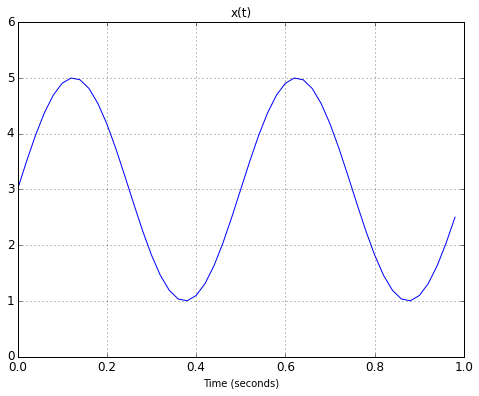

In [1]:
%pylab inline
import pandoc 
rcParams['figure.figsize']=(8,6)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'

n = arange(50)
fs = 50.0
t = n/fs
x = 2*sin(2*np.pi*2*t) + 3
p1= plot(t,x)
xlabel('Time (seconds)')
grid()
title('x(t)')
ylim([0,6])


# Question:
Refering the continuous time signal given above:
- What is the period?
- What is the average value?
- What is the peak-to-peak ($ \bf{V_{p-p}} $)  and peak ($ \bf{V_p} $) values?

## Answer:
- Full cycle lasts for 0.5 seconds, so $\bf{T} = 0.5 $ seconds
- The sinusoidal signal deviates around 3 (rather than 0) the average value is 3. This is also called the DC offset.
- Peak-to-peak value is the difference between maximum and minimum values of the signal. So $ \bf{V_{p-p}} = 5-1 = 4 $ V and thus $ \bf{V_p}=2 $ V.

## Writing the signal equation:
General form of a sinusoidal signal with a peak value of $ \bf{V_p} $, a frequency of $ \bf{f} $ and an offset value of $ \bf{O} $ is given by
$$ x(t) = V_p sin(2\pi ft) + o $$
Thus, 
$$ x(t) = 2sin(2\pi 2t) + 3 $$
$$ x(t) = 2sin(4\pi t) + 3 $$
 

(0.5, 5.5)

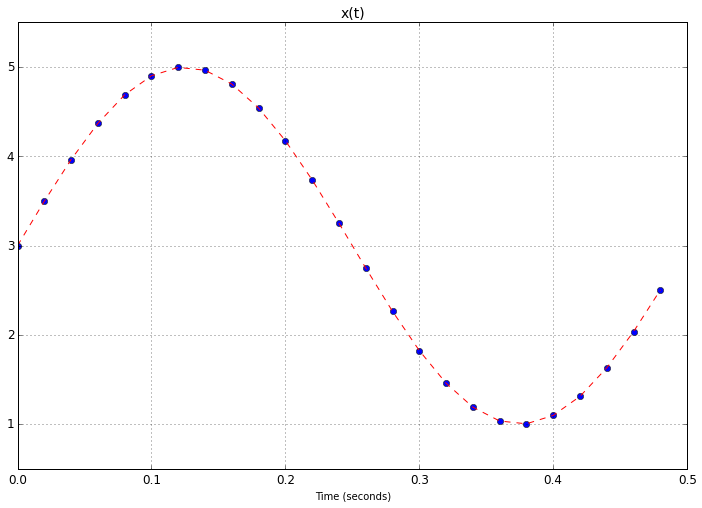

In [7]:

rcParams['figure.figsize']=(12,8)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'
rcParams['axes.titlesize']=14

n = arange(25)
fs = 50.0
t = n/fs
x = 2*sin(2*np.pi*2*t) + 3
p1= plot(t,x,'o')
hold(True)
p2 = plot(t,x,'--r')
xlabel('Time (seconds)')
grid()
title('x(t)')
ylim([0.5,5.5])


# Sampling Frequency
- Engineering Units: Samples per second
- Symbol: $ \bf{f_s} $
- Describes the number of samples acquired in a second.


# Quantization and Sampling
- Engineering Units: Bits per second
- Two parameters needed:
        - Quantization (ADC) bits..i.e. 8 bits, 10 bits and etc.
        - Sampling frequency….i.e. 8 kHz, 44100 Hz, 96 kHz and etc.
- Describes the total number of bits generated in 1 second.

# Quantization and Sampling
## Question:
- Calculate the number of bits required for a S/H system with
    - fs = 48 kHz and
    - 16 bit uniform quantization with no compression
    
## Solution
    - 16 x 48000 = 768000 bps or 768 kbps (KiloBitsPerSecond)


# Discrete vs. Continuous time variables

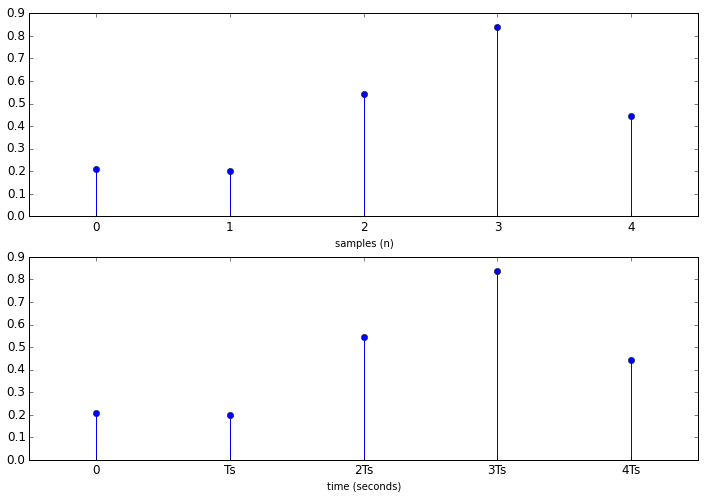

In [4]:
rcParams['figure.figsize']=(12,8);
n = arange(5)
xtick_labels = ['0','Ts','2Ts','3Ts','4Ts']
w = random.random([5])
for c in w:
    if c<.2:
        w = w - min(w) + 0.2 
subplot(211)
p1 = stem(n, w)
xlim([-.5, 4.5])
xlabel('samples (n)');
subplot(212)
p2 = stem(n, w)
xticks(n,xtick_labels);
xlim([-.5, 4.5]);
xlabel('time (seconds)');

- As the figures above reveal, we have samples at integer multiples of $\bf{T_s}$.
- The relationship between continuous and discrete time variables is $ t\ = n\ T_s $ or $ t\ = \frac{n}{f_s} $ where $ n = \{0,1,..,\inf \} $

# Discrete form of a continuous time function sampled at $ T_s$

The continuous time function
$$\ $$
$$ x(t) = 2sin(4\pi t )+ 2,\ \ \ t\ge 0$$
$$\ $$
has discrete time domain form:
$$\ $$
$$ x(nT_s) = 2sin(4\pi nT_s)+ 2,\ \ \    n = \{0,1,2,...,\inf\}  $$
$$\ $$
where $ \bf{T_s} $ is the sampling interval (period) in time. For a discrete time system with a specific $\bf{T_s}$, we can write 
$$\ $$
$$ x(n) = 2sin(4\pi nT_s)+ 2 $$
$$\ $$
If the sampling frequency is 50 Hz, we have $ \bf{f_s} $ = 50 Hz, $ \bf{T_s} =\frac{1}{f_s}=\frac{1}{50}=0.02 $  seconds. Thus, we can write
$$\ $$
$$ x(n) = 2sin(0.08\pi n)+ 2 $$
$$\ $$

